# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from maddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import torch
from workspace_utils import active_session

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### My Implementaion

#### Design Story

I based my solution to this project off of my previous project 2 submission. I think it really hit me on this project, how the deep reinforcement learning structure is built out. This project went a lot smoother than the previous one. I began with the implementation of the MADDPG discussed in class, with some minor adjustments for monitoring the success conditions and exiting once those were met. Once I cleared up a few syntax bugs, everything ran very smoothly, including getting some really high reward scores at the end of the training.

### Model 

##### Agents 
The agent model contained 3 fully connected layers, each of which are activated with a RELU function, with the exception of the final layer which is activated by a tanh. 

Layers  
  Input: The state size, in this case 24  
  FC1: 256 Nodes  
  FC2: 128 Nodes  
  Output: 2 Nodes  
  
##### Critics 
The agent model contained 3 fully connected layers, each of which are activated with a RELU function, with the exception of the concatenation layer which pulls in the action state.

Layers  
  Input: The state size, in this case 24  
  FC1: 256 Nodes  
  FC2: 128 Nodes  
  Output: 1 Node  
  
#### Hyper Parameters 

Number of Episodes: Unknown, set to terminate after hitting 100 0.5+ episodes or hitting 2000 total episodes  
Max Time Steps: 1000  
Replay Buffer Size: int(1e6)  
Mini Batch Size: 128  
Discount Factor: 0.99  
Actor Learning rate: 1e-3  
Critic Learning rate: 1e-3  
Critic Weight Decay: 0  
Volatility Parameter: 0.2     
Speed of Mean Reversion: 0.15  
Noise Multiplier: 1.0  
Noise Multiplyer Reduction Rate: 1e-6  

#### Learning Algorithm
 
For this project I implemented a Multi-Agent Deep Deterministic Policy Gradient like we learned in this section of the course. I feel like spending so much time on the previous project prepared me for this one really well. Much of my implementaion was recycled from that project, with the exception of having multiple agents in this case. Without using a batch normalizing layer as I did in the previous project, the learning speed was much more managable. 

Each episode is executed by gathering the current state, reseting the 2 agents. Then we enter a loop where the agents take action based on the state until we register a positive done enviornment var. Once we exit the loop, we take the maximum of the agents rewards and log them along with incrementing the moving average. Once we have achieved an average of over 0.5 reward score over 100 iterations, the training terminates and  

In [8]:
def maddpg(n_episodes=2000, max_t=1000, sw_cnt=100):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes     : maximum number of training episodes
        max_t          : maximum number of timesteps per episode
        sw_cnt         : score window max length

    """
    scores_window = deque(maxlen=sw_cnt)
    scores_final = []
    exit_scores = []
    exit_average = []
    moving_average = []
    start_counting = False  
    avg_episodes = 0

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = np.reshape(env_info.vector_observations, (1,48)) 
        agent1.reset()
        agent2.reset()
        scores = np.zeros(num_agents)
        
        for timestamp in range(0, max_t):
            actions = np.concatenate((agent1.act(states,True), agent2.act(states,True)), axis=0).flatten()
            env_info = env.step(actions)[brain_name]
            next_states = np.reshape(env_info.vector_observations, (1, 48))
            rewards = env_info.rewards                       
            done = env_info.local_done                        
            
            agent1.step(states, actions, rewards[0], next_states, done, 0)
            agent2.step(states, actions, rewards[1], next_states, done, 1) 
            scores += np.max(rewards)                      
            states = next_states                               
            if np.any(done): break

        score = np.max(scores)
        scores_window.append(score)
        scores_final.append(score)
        moving_average.append(np.mean(scores_window))

        if score > 0.5:
            if not start_counting: 
                print('Starting...')
                start_counting = True
                exit_scores = [] 
                exit_average = []
        elif start_counting and exit_average[-1] < 0.5: 
            start_counting = False
            print('Ending...')
            print('Hit good average for: ' + str(len(exit_average)) + ' Iterations\n')
            
        
        if start_counting:
            exit_scores.append(score)
            exit_average.append(np.mean(exit_scores))
            if i_episode % 10 == 0:
                print('Episode: ' + str(i_episode) + '  Max Reward: ' + str(np.max(scores_final[-10:])) + '  Exit Average: ' + str(exit_average[-1]))
            
        if start_counting and i_episode % 5: 
            torch.save(agent1.actor_local.state_dict(), 'models/actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'models/critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'models/actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'models/critic2.pth')
        
        if len(exit_average) >= 100: break

    return scores_final, moving_average

Starting...
Ending...
Hit good average for: 3 Iterations

Starting...
Episode: 530  Max Reward: 0.900000013411  Exit Average: 0.600000008941
Ending...
Hit good average for: 2 Iterations

Starting...
Episode: 540  Max Reward: 0.500000007451  Exit Average: 0.250000003725
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Episode: 640  Max Reward: 0.500000007451  Exit Average: 0.500000007451
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 3 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Ending...
Hit good average for: 2 Iterations

Starting...
Episode: 780  Max Reward: 1.0000000149  Exit Average: 0.500000007451
Ending...
Hit good average for: 4 Iterations

Starting...
Ending...


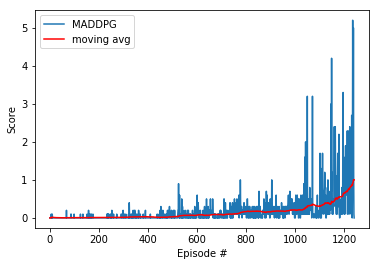

In [9]:
with active_session():
    agent1 = Agent(state_size, action_size, agents=1, seed=0)
    agent2 = Agent(state_size, action_size, agents=1, seed=0)

    scores, avgs = maddpg()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, label='MADDPG')
    plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left');
    plt.show()

### Future Steps

In the future I would like to let this train for even longer. The model seems to be beginning a steep climb as it hit its goal rolling average. I ran out of time to do more testing, but would be curious to see if that climb is stable or if further training would be unstable. 

I would also like to try other model architectures if the above reveals an issue, since I have a fairly simple architecture as it stands. I am sure that a batch normalizing layer could improve performance like we saw in the previous project, but in the intrest of time, I did not implement it. 

Overall, this course has been a great experience for me. I have a lot of personal and work projects in mind that I could implememnt a Deep Reinforcement Solution for and I am excited to try.